# Data Visualization

In [1]:
#import libries
import numpy as np
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt

## Read CSV

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('./dataset/dollar_exchange_cleaned.csv')

In [3]:
df.head()

,Date,CNY,OMR,IRR,THB,MYR,YER,VND,ILS,JPY,LKR,IQD,PKR,KWD,KHR,UZS,SGD,INR,BDT,PHP,JOD,LAK,IDR,KRW,KZT,AED,BHD,LBP,TRY,SAR,MVR,QAR,MMK,NPR,BND
0,2004-01-01,8.27,0.38,8569.476054,39.24,3.81,180.328936,15312.984436,4.38,107.30,96.65,1311.517255,57.30,0.29,3786.695686,712.35,1.7,45.53,57.694669,55.24,0.71,7622.044314,8336.8,1181.6,161.124825,3.67,0.38,1481.172941,1.344115,3.75,712.35,3.64,6.177686,70.052101,1.69
1,2004-01-02,8.27,0.38,8236.200000,39.53,3.80,180.328936,15147.000000,4.40,106.91,97.04,0.300000,57.10,0.29,3854.100000,712.35,1.7,45.60,57.220000,55.40,0.70,7645.700000,8445.4,1195.8,168.480000,3.67,0.38,1474.100000,1.344115,3.75,712.35,3.64,6.180000,70.600000,1.68
2,2004-01-05,8.27,0.38,8731.500000,39.26,3.80,180.328936,15148.000000,4.37,106.24,97.25,0.300000,57.10,0.29,3855.000000,712.35,1.7,45.47,57.230000,55.29,0.71,7643.700000,8369.8,1178.9,168.020000,3.67,0.38,1474.600000,1.344115,3.75,712.35,3.64,6.180000,70.620000,1.68
3,2004-01-06,8.27,0.38,8724.700000,39.03,3.80,180.328936,15150.000000,4.37,106.23,97.50,0.300000,57.10,0.29,3852.800000,712.35,1.7,45.55,56.920000,54.85,0.71,7639.000000,8361.8,1189.4,167.550000,3.67,0.38,1473.800000,1.344115,3.75,712.35,3.64,6.180000,70.580000,1.68
4,2004-01-07,8.27,0.38,8728.700000,38.97,3.81,180.328936,15153.000000,4.39,106.18,97.50,0.300000,57.35,0.29,3853.900000,712.35,1.7,45.39,57.240000,54.91,0.71,7641.500000,8369.3,1176.8,167.430000,3.67,0.38,1474.300000,1.344115,3.75,712.35,3.64,6.180000,70.600000,1.68


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4956 non-null   object 
 1   CNY     4956 non-null   float64
 2   OMR     4956 non-null   float64
 3   IRR     4956 non-null   float64
 4   THB     4956 non-null   float64
 5   MYR     4956 non-null   float64
 6   YER     4956 non-null   float64
 7   VND     4956 non-null   float64
 8   ILS     4956 non-null   float64
 9   JPY     4956 non-null   float64
 10  LKR     4956 non-null   float64
 11  IQD     4956 non-null   float64
 12  PKR     4956 non-null   float64
 13  KWD     4956 non-null   float64
 14  KHR     4956 non-null   float64
 15  UZS     4956 non-null   float64
 16  SGD     4956 non-null   float64
 17  INR     4956 non-null   float64
 18  BDT     4956 non-null   float64
 19  PHP     4956 non-null   float64
 20  JOD     4956 non-null   float64
 21  LAK     4956 non-null   float64
 22  

## Convert Date to datetime format

Convert date to correct format and sort the rows according to earliest date to latest date.

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4956 non-null   datetime64[ns]
 1   CNY     4956 non-null   float64       
 2   OMR     4956 non-null   float64       
 3   IRR     4956 non-null   float64       
 4   THB     4956 non-null   float64       
 5   MYR     4956 non-null   float64       
 6   YER     4956 non-null   float64       
 7   VND     4956 non-null   float64       
 8   ILS     4956 non-null   float64       
 9   JPY     4956 non-null   float64       
 10  LKR     4956 non-null   float64       
 11  IQD     4956 non-null   float64       
 12  PKR     4956 non-null   float64       
 13  KWD     4956 non-null   float64       
 14  KHR     4956 non-null   float64       
 15  UZS     4956 non-null   float64       
 16  SGD     4956 non-null   float64       
 17  INR     4956 non-null   float64       
 18  BDT     

In [7]:
df = df.sort_index()
df = df.set_index('Date')
print(df.shape)
df.head()

(4956, 34)


,CNY,OMR,IRR,THB,MYR,YER,VND,ILS,JPY,LKR,IQD,PKR,KWD,KHR,UZS,SGD,INR,BDT,PHP,JOD,LAK,IDR,KRW,KZT,AED,BHD,LBP,TRY,SAR,MVR,QAR,MMK,NPR,BND
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-01,8.27,0.38,8569.476054,39.24,3.81,180.328936,15312.984436,4.38,107.30,96.65,1311.517255,57.30,0.29,3786.695686,712.35,1.7,45.53,57.694669,55.24,0.71,7622.044314,8336.8,1181.6,161.124825,3.67,0.38,1481.172941,1.344115,3.75,712.35,3.64,6.177686,70.052101,1.69
2004-01-02,8.27,0.38,8236.200000,39.53,3.80,180.328936,15147.000000,4.40,106.91,97.04,0.300000,57.10,0.29,3854.100000,712.35,1.7,45.60,57.220000,55.40,0.70,7645.700000,8445.4,1195.8,168.480000,3.67,0.38,1474.100000,1.344115,3.75,712.35,3.64,6.180000,70.600000,1.68
2004-01-05,8.27,0.38,8731.500000,39.26,3.80,180.328936,15148.000000,4.37,106.24,97.25,0.300000,57.10,0.29,3855.000000,712.35,1.7,45.47,57.230000,55.29,0.71,7643.700000,8369.8,1178.9,168.020000,3.67,0.38,1474.600000,1.344115,3.75,712.35,3.64,6.180000,70.620000,1.68
2004-01-06,8.27,0.38,8724.700000,39.03,3.80,180.328936,15150.000000,4.37,106.23,97.50,0.300000,57.10,0.29,3852.800000,712.35,1.7,45.55,56.920000,54.85,0.71,7639.000000,8361.8,1189.4,167.550000,3.67,0.38,1473.800000,1.344115,3.75,712.35,3.64,6.180000,70.580000,1.68
2004-01-07,8.27,0.38,8728.700000,38.97,3.81,180.328936,15153.000000,4.39,106.18,97.50,0.300000,57.35,0.29,3853.900000,712.35,1.7,45.39,57.240000,54.91,0.71,7641.500000,8369.3,1176.8,167.430000,3.67,0.38,1474.300000,1.344115,3.75,712.35,3.64,6.180000,70.600000,1.68


Remarks:

Date and rows has been formatted and converted.

## Visualizing Moving Averages

Moving averages (MA) is used to help smooth out price data by creating a constantly updated average price. When there is a rising moving average, this indicates that there is an uptrend. vice versa, a declining moving average indicates a downtrend.

In [8]:
df.columns

Index(['CNY', 'OMR', 'IRR', 'THB', 'MYR', 'YER', 'VND', 'ILS', 'JPY', 'LKR',
       'IQD', 'PKR', 'KWD', 'KHR', 'UZS', 'SGD', 'INR', 'BDT', 'PHP', 'JOD',
       'LAK', 'IDR', 'KRW', 'KZT', 'AED', 'BHD', 'LBP', 'TRY', 'SAR', 'MVR',
       'QAR', 'MMK', 'NPR', 'BND'],
      dtype='object')

### Chinese Yuan (CNY)

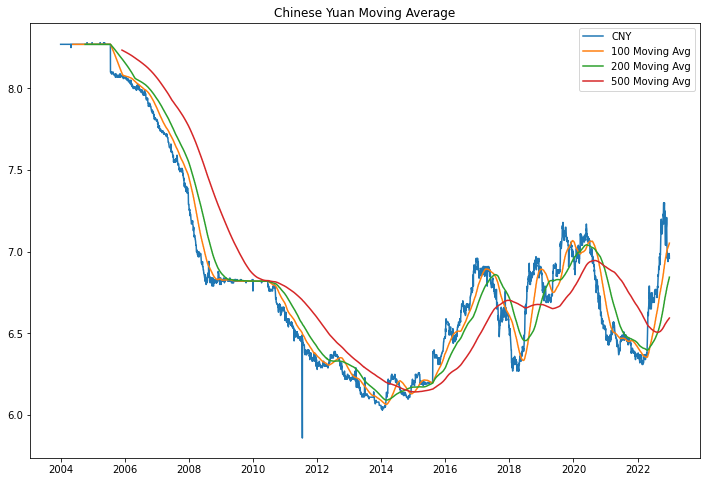

In [9]:
plt.figure(figsize=(12,8))
plt.title('Chinese Yuan Moving Average')
plt.plot(df['CNY'], label='CNY') #plot y using x as an index
plt.plot(df['CNY'].rolling(100).mean(), label = '100 Moving Avg')
plt.plot(df['CNY'].rolling(200).mean(), label = '200 Moving Avg')
plt.plot(df['CNY'].rolling(500).mean(), label = '500 Moving Avg')

plt.legend();

Observations:

Drawing upon the moving average of CNY, a remarkable ascent of the Chinese economy against the USD becomes evident, with a staggering growth of over 30% from 2005 to 2014. This surge can be attributed to China's widening trade surplus, which expanded from 18.5 billion in April to an impressive 35.9 billion in May. [Link](https://www.cnbc.com/2014/06/10/from-weak-to-strong-chinas-yuan-changes-track.html)

Nevertheless, a contrasting trend emerges as the CNY gradually weakens over time. This can be attributed to a series of three consecutive devaluations, resulting in a depreciation of over 3% in its value. [Link](https://www.investopedia.com/trading/chinese-devaluation-yuan/)

### Thai Baht (THB)

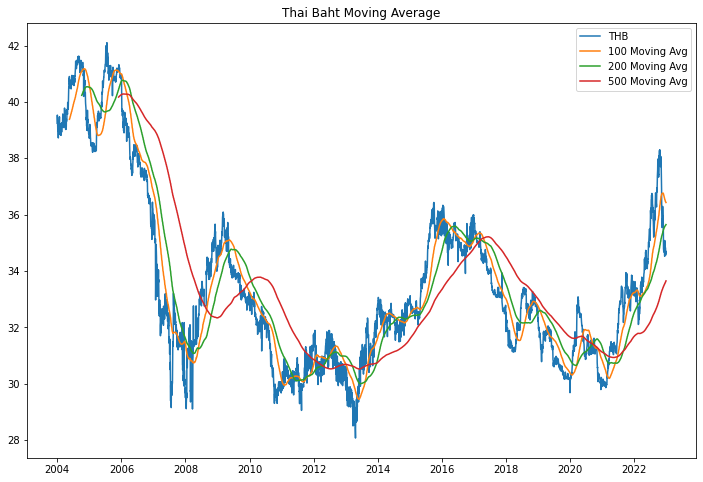

In [10]:
plt.figure(figsize=(12,8))
plt.title('Thai Baht Moving Average')
plt.plot(df['THB'], label='THB') #plot y using x as an index
plt.plot(df['THB'].rolling(100).mean(), label = '100 Moving Avg')
plt.plot(df['THB'].rolling(200).mean(), label = '200 Moving Avg')
plt.plot(df['THB'].rolling(500).mean(), label = '500 Moving Avg')
plt.legend();

Observations:

An intriguing observation unfolds as we delve into the realm of currency fluctuations, specifically focusing on the Thai Baht (THB). Notably, the THB reached its highest appreciation in 2013, driven by Thailand's astute response to the [taper tantrum](https://www.cfr.org/blog/follow-thai-baht) that year. However, a subsequent depreciation occurred in 2015, attributed to the China scare. Moreover, recent observations indicate a renewed depreciation trend for THB starting in 2020, predominantly influenced by the [global economic downturn](https://www.voanews.com/a/thailand-welcomes-tourism-economic-progress-looks-ahead-to-2023-elections-/6908283.html) caused by the COVID-19 pandemic. Thailand, heavily reliant on tourism, experienced a notable 6% decline in its economy during 2020. Nonetheless, promising signs of recovery are now emerging as Thailand gradually rebounds from the impact of the global economic downturn.

### Singapore Dollar (SGD)

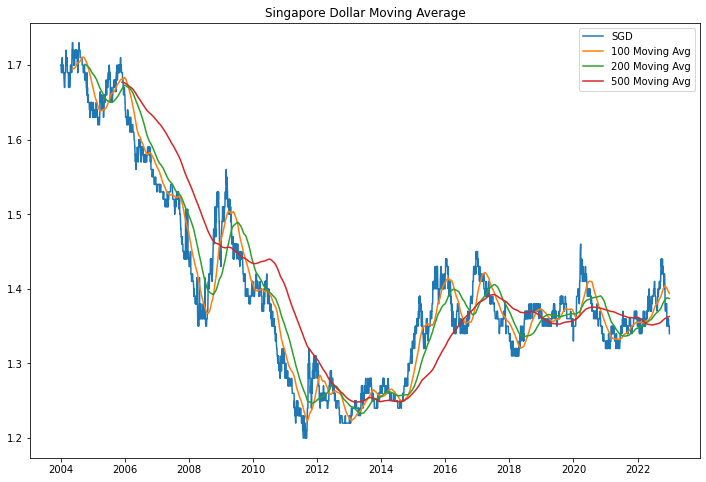

In [11]:
plt.figure(figsize=(12,8))
plt.title('Singapore Dollar Moving Average')
plt.plot(df['SGD'], label='SGD') #plot y using x as an index
plt.plot(df['SGD'].rolling(100).mean(), label = '100 Moving Avg')
plt.plot(df['SGD'].rolling(200).mean(), label = '200 Moving Avg')
plt.plot(df['SGD'].rolling(500).mean(), label = '500 Moving Avg')
plt.legend();

Observations:

An intriguing journey through the dynamics of currency fluctuations brings us to the Singapore Dollar (SGD), where fascinating patterns emerge. Notably, SGD soared to an all-time high in 2011, driven by the decisive actions of the Monetary Authority of Singapore (MAS). By announcing a modest revaluation of the Singapore dollar, MAS sparked a remarkable appreciation of 0.7%.

However, a shift in the tides occurred during the period of 2020-2022, witnessing a depreciation of the Singapore dollar. This depreciation can be attributed to the profound impact of the global economic downturn caused by the pandemic. Notably, tourism, which contributed approximately 4% to Singapore's domestic product in 2019 according to [Statista](https://www.statista.com/topics/5234/tourism-and-hospitality-in-singapore/#topicOverview), experienced a significant downturn, directly influencing the depreciation of the Singapore dollar.

Encouragingly, as we look beyond 2022, a captivating trend emerges: the Singapore dollar once again begins to appreciate. This trend suggests a promising recovery and underscores the resilience and adaptability of Singapore's economy amidst challenging global circumstances.

# Visualizing Resampled Annual Mean 

Resampling: Resampling is for frequency conversion and resampling of time series. Resampling is used when one needs to change the data instead of daily to monthly or weekly etc. or vice versa.

In [65]:
def plot_series(df, col, title='Title', xlab=None, ylab=None, steps=1):

    plt.figure(figsize=(18,9))
    plt.plot(df[col])
        
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

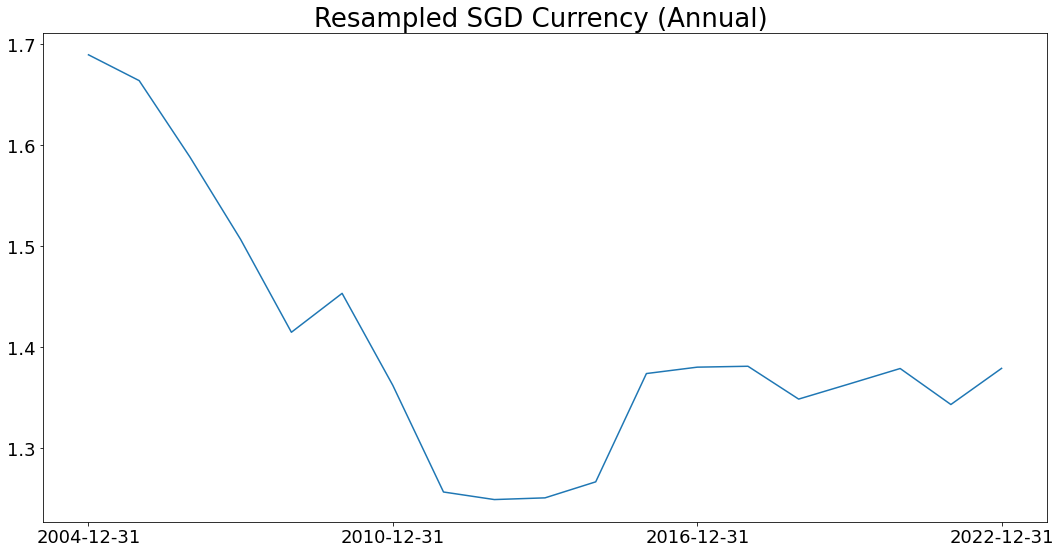

In [62]:
plot_series(df.resample('A').mean(), 'SGD', title = "Resampled SGD Currency (Annual) ", steps=6)

Upon examination of the data, it becomes apparent that the graph represents a resampled mean of the 'annual' SGD currency performance. Consequently, it offers a clearer depiction of how effectively the SGD currency has performed over the years. Notably, the years 2011-2014 exhibited the strongest performance for the SGD currency. Subsequently, a gradual depreciation took place over time. Nevertheless, it is noteworthy that the SGD currency demonstrated resilience in comparison to its performance in 2004, as it managed to withstand the challenges posed by the global pandemic from 2020 to 2022, signifying a notable improvement.

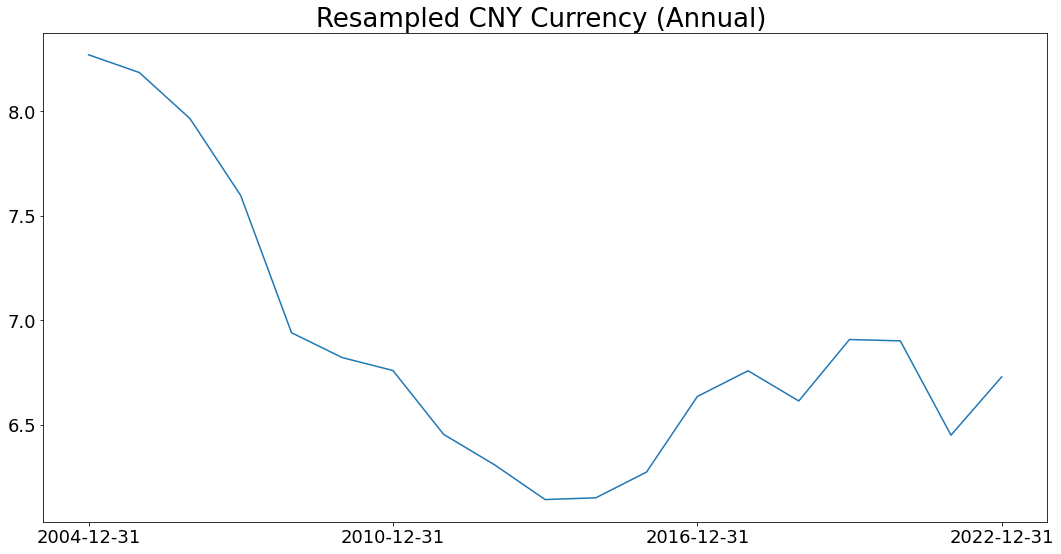

In [63]:
plot_series(df.resample('A').mean(), 'CNY', title = "Resampled CNY Currency (Annual) ", steps=6)

It is noteworthy to observe that the CNY currency experienced its peak performance during the years 2013-2014 when it reached an unprecedented all-time low. Over the course of subsequent years, there has been a slight depreciation, with the currency gradually moving from a value of less than 6.5 to slightly above 7.0. Despite this depreciation, it is important to acknowledge the significant strides the CNY currency has made when compared to its standing in 2004, exhibiting substantial improvements over time.

Moreover, it is worth highlighting the resilience demonstrated by the CNY currency, particularly in the face of the recent global pandemic from 2020 to 2022. Despite the challenges posed by this unprecedented crisis, the currency showcased remarkable stability and managed to avoid substantial depreciation. This noteworthy performance is a testament to the strength and adaptability of the CNY currency in navigating and withstanding the adverse effects of the pandemic, underscoring its commendable performance.

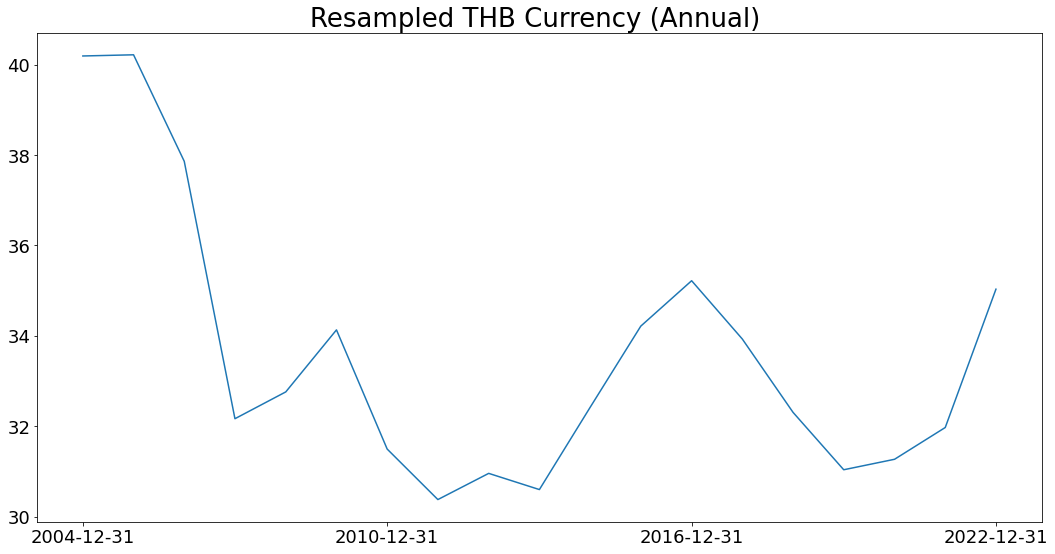

In [64]:
plot_series(df.resample('A').mean(), 'THB', title = "Resampled THB Currency (Annual) ", steps=6)

An intriguing observation emerges when examining the THB currency trends. Notably, the most substantial appreciation occurred in the years 2011-2012, showcasing a period of remarkable growth for the THB. However, it is worth mentioning that during the global pandemic from 2020 to 2022, the THB faced challenges in terms of resilience, experiencing a depreciation of nearly 5 dollars. 

Furthermore, a notable characteristic of the THB currency is its tendency to exhibit fluctuations over the years when compared to the other currencies mentioned. Despite these fluctuations, it is essential to recognize the overall appreciation of the THB currency when compared to its standing in 2004. This appreciation, despite the occasional ups and downs, signifies progress and reflects the positive trajectory of the THB currency.